# My Matched SFR
My catalogue matched with COSMOS but done by myself. primary is matched on position, and secondary is matched by redshift from within a ten arcsecond radius.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
tqdm.pandas()

In [2]:
data_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/data'

In [3]:
my_cosmo_cat = pd.read_csv(f'{data_folder}/cosmos-matched-all-df.csv', index_col = 0)

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (460,1000) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
my_cosmo_cat.head()

,SourceID,ra_1,dec_1,clon_1,clat_1,id_1,x_image_1,y_image_1,errx2_image_1,erry2_image_1,...,sfr_best_2,ssfr_med_2,ssfr_med_min68_2,ssfr_med_max68_2,ssfr_best_2,l_nu_2,l_r_2,l_k_2,dist_2,angle_2
0,4000705532455,150.679866,2.196563,10h02m43.17s,02d11m47.63s,590539,9199.92676,21737.71094,0.00013,0.00013,...,-1.055,-8.625,-8.745,-8.435,-8.666,27.074,27.260,27.124,9.361438,123.114321
1,4000705532984,150.673687,2.226308,10h02m41.68s,02d13m34.71s,610283,9348.38770,22451.56250,0.00000,0.00001,...,-0.219,-8.373,-8.837,-8.043,-8.287,27.848,27.868,27.811,7.778731,317.303720
2,4000705533312,150.668120,2.242867,10h02m40.35s,02d14m34.32s,621053,9482.06250,22848.95508,0.00002,0.00000,...,0.505,-10.300,-10.368,-10.231,-10.258,28.661,29.620,29.874,2.627196,14.847254
3,4000705533383,150.645145,2.237538,10h02m34.83s,02d14m15.14s,617834,10033.03906,22720.83008,0.00011,0.00019,...,1.032,-8.440,-8.550,-8.334,-8.448,29.135,29.232,29.068,2.241379,287.399545
4,4000705539529,149.686238,2.637428,09h58m44.70s,02d38m14.74s,882817,33027.07031,32317.89648,0.00007,0.00006,...,0.191,-8.863,-8.987,-8.724,-8.830,28.323,28.572,28.466,3.301196,89.699137


In [5]:
my_cosmo_cat.type_1.value_counts()

0    2919
Name: type_1, dtype: int64

In [6]:
my_cosmo_cat.type_2.value_counts()

0    2919
Name: type_2, dtype: int64

In [7]:
stu_cosmo_cat = pd.read_csv(f'{data_folder}/cat-matched-to-cosmos.csv', index_col = 0)[['SourceID', 'category']]

In [8]:
df_merge = my_cosmo_cat.merge(stu_cosmo_cat, on = 'SourceID', how = 'left')

In [9]:
df_merge.columns

Index(['SourceID', 'ra_1', 'dec_1', 'clon_1', 'clat_1', 'id_1', 'x_image_1',
       'y_image_1', 'errx2_image_1', 'erry2_image_1',
       ...
       'ssfr_med_2', 'ssfr_med_min68_2', 'ssfr_med_max68_2', 'ssfr_best_2',
       'l_nu_2', 'l_r_2', 'l_k_2', 'dist_2', 'angle_2', 'category'],
      dtype='object', length=1082)

### Looking at Redshift

In [10]:
len(df_merge.query('id_1 == id_2'))

0

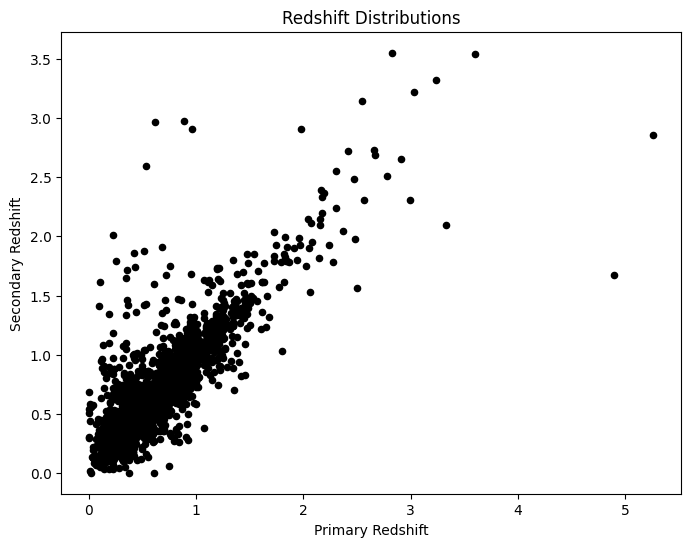

In [11]:
fig, ax1 = plt.subplots(nrows = 1)
df_merge.plot.scatter(
    x = 'photoz_1',
    y = 'photoz_2',
    ax = ax1,
    figsize = (8,6),
    grid = False,
    color = 'black',
)
ax1.set_title('Redshift Distributions')
ax1.set_xlabel('Primary Redshift')
ax1.set_ylabel('Secondary Redshift')
plt.show()

In [12]:
cos_red = df_merge[['SourceID', 'photoz_1', 'photoz_2']]

In [13]:
zs = cos_red.assign(redshift_sub = cos_red.apply(lambda row: row.photoz_1 - row.photoz_2, axis = 1))

In [14]:
real_mergers = zs.query('redshift_sub < 0.2 and redshift_sub > -0.2 ')[['SourceID', 'redshift_sub']]

In [15]:
len(real_mergers)

2463

In [19]:
df_merg = real_mergers.merge(df_merge, on = 'SourceID', how = 'left').drop(columns = 'redshift_sub')

In [21]:
df_merg.to_csv('C:/Users/oryan/Documents/mergers-in-cosmos/data/cosmos-matched-all-real-df.csv')

In [ ]:
df

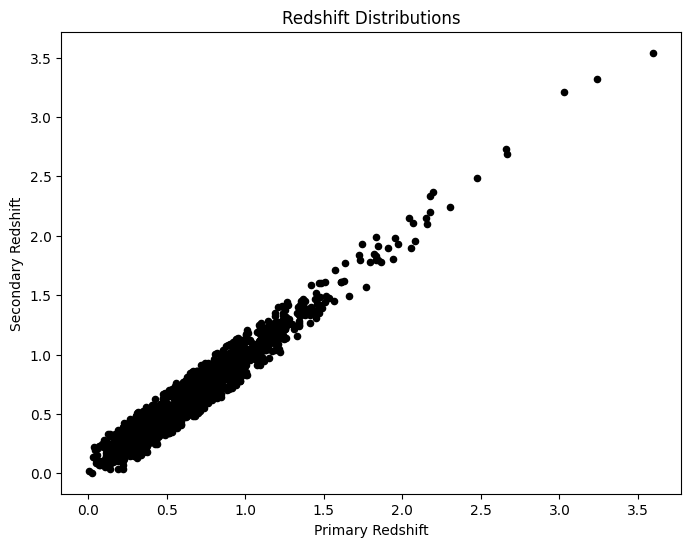

In [15]:
fig, ax1 = plt.subplots(nrows = 1)
df_merg.plot.scatter(
    x = 'photoz_1',
    y = 'photoz_2',
    ax = ax1,
    figsize = (8,6),
    grid = False,
    color = 'black',
)
ax1.set_title('Redshift Distributions')
ax1.set_xlabel('Primary Redshift')
ax1.set_ylabel('Secondary Redshift')
plt.show()

### Looking at Mass Distribution

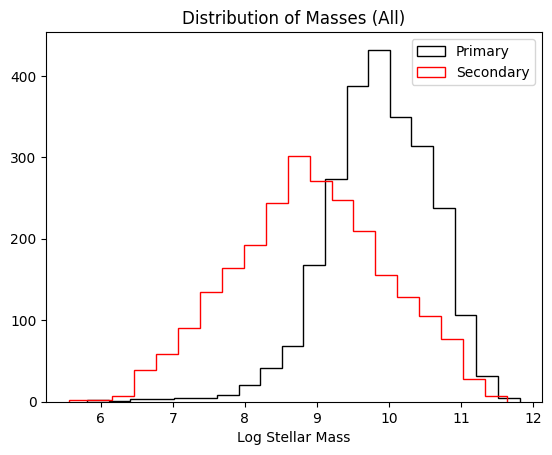

In [16]:
fig, ax1 = plt.subplots(nrows = 1)
df_merg.hist(
    column = ['mass_best_1'],
    ax = ax1,
    bins = 20,
    figsize = (6,8),
    grid = False,
    color = 'black',
    histtype='step',
    label = ['Primary'],
    sharex = True,
    sharey = True
)

df_merg.hist(
    column = ['mass_best_2'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'red',
    histtype='step',
    label = ['Secondary'],
    sharex = True,
    sharey = True
)


ax1.set_title('Distribution of Masses (All)')
ax1.set_xlabel('Log Stellar Mass')
plt.legend()
plt.show()

In [17]:
cosmo_cat_1 = df_merg.query('category=="stage1"')
cosmo_cat_2 = df_merg.query('category=="stage2"')
cosmo_cat_3 = df_merg.query('category=="stage3"')
cosmo_cat_4 = df_merg.query('category=="stage4"')

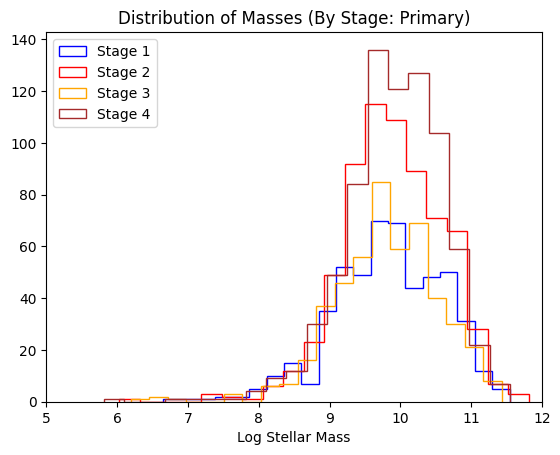

In [18]:
fig, ax1 = plt.subplots(nrows = 1)
cosmo_cat_1.hist(
    column = ['mass_best_1'],
    ax = ax1,
    bins = 20,
    figsize = (6,8),
    grid = False,
    color = 'blue',
    histtype='step',
    label = ['Stage 1'],
    sharex = True,
    sharey = True
)

cosmo_cat_2.hist(
    column = ['mass_best_1'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'red',
    histtype='step',
    label = ['Stage 2'],
    sharex = True,
    sharey = True
)

cosmo_cat_3.hist(
    column = ['mass_best_1'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'orange',
    histtype='step',
    label = ['Stage 3'],
    sharex = True,
    sharey = True
)

cosmo_cat_4.hist(
    column = ['mass_best_1'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'brown',
    histtype='step',
    label = ['Stage 4'],
    sharex = True,
    sharey = True
)

ax1.set_title('Distribution of Masses (By Stage: Primary)')
ax1.set_xlabel('Log Stellar Mass')
ax1.set_xlim([5,12])
plt.legend(loc = 'upper left')
plt.show()

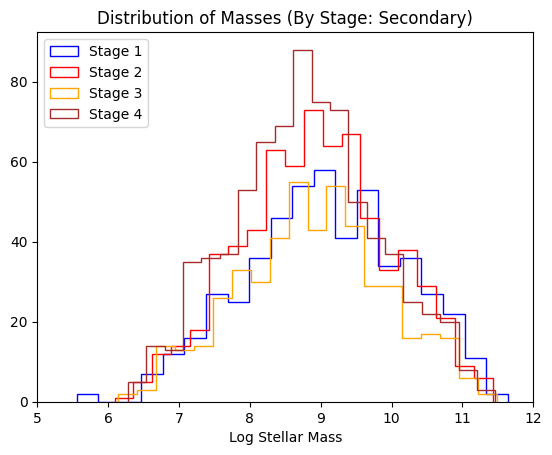

In [19]:
fig, ax1 = plt.subplots(nrows = 1)
cosmo_cat_1.hist(
    column = ['mass_best_2'],
    ax = ax1,
    bins = 20,
    figsize = (6,8),
    grid = False,
    color = 'blue',
    histtype='step',
    label = ['Stage 1'],
    sharex = True,
    sharey = True
)

cosmo_cat_2.hist(
    column = ['mass_best_2'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'red',
    histtype='step',
    label = ['Stage 2'],
    sharex = True,
    sharey = True
)

cosmo_cat_3.hist(
    column = ['mass_best_2'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'orange',
    histtype='step',
    label = ['Stage 3'],
    sharex = True,
    sharey = True
)

cosmo_cat_4.hist(
    column = ['mass_best_2'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'brown',
    histtype='step',
    label = ['Stage 4'],
    sharex = True,
    sharey = True
)

ax1.set_title('Distribution of Masses (By Stage: Secondary)')
ax1.set_xlabel('Log Stellar Mass')
ax1.set_xlim([5,12])
plt.legend(loc = 'upper left')
plt.show()

### Checking Mass Ratios

In [20]:
def calc_ratio(log_m1, log_m2):
    m1 = 10**log_m1
    m2 = 10**log_m2
    if m2/m1 <= 1:
        return m2 / m1
    else:
        return m1/m2

In [21]:
cosmo_ratio = (
    df_merg
    .assign(mass_ratio = df_merg.apply(lambda row: calc_ratio(row.mass_best_1, row.mass_best_2), axis = 1))
)

In [22]:
cosmo_rat_qur = cosmo_ratio.query('mass_ratio <= 100')

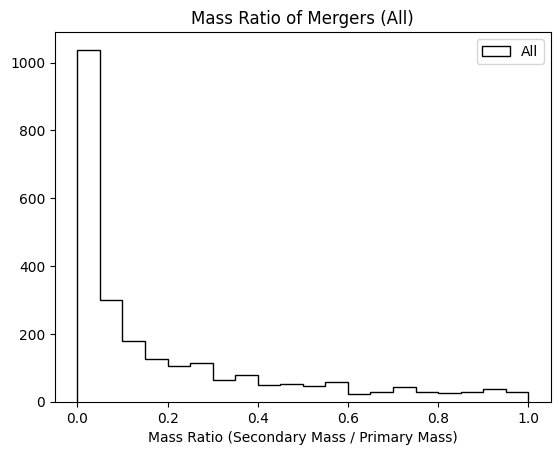

In [23]:
fig, ax1 = plt.subplots(nrows = 1)
cosmo_rat_qur.hist(
    column = ['mass_ratio'],
    ax = ax1,
    bins = 20,
    figsize = (6,8),
    grid = False,
    color = 'black',
    histtype='step',
    label = ['All'],
    sharex = True,
    sharey = True
)

ax1.set_title('Mass Ratio of Mergers (All)')
ax1.set_xlabel('Mass Ratio (Secondary Mass / Primary Mass)')
plt.legend()
plt.show()

In [24]:
tmp = len(cosmo_ratio.query('mass_ratio > 0.80')) / len(cosmo_ratio)
print(f'{tmp*100}% of this sample are major mergers of approximately 1:1 mass ratio.')

4.953308972797402% of this sample are major mergers of approximately 1:1 mass ratio.


In [25]:
cosmo_ratio_1 = cosmo_rat_qur.query('category == "stage1"')
cosmo_ratio_2 = cosmo_rat_qur.query('category == "stage2"')
cosmo_ratio_3 = cosmo_rat_qur.query('category == "stage3"')
cosmo_ratio_4 = cosmo_rat_qur.query('category == "stage4"')

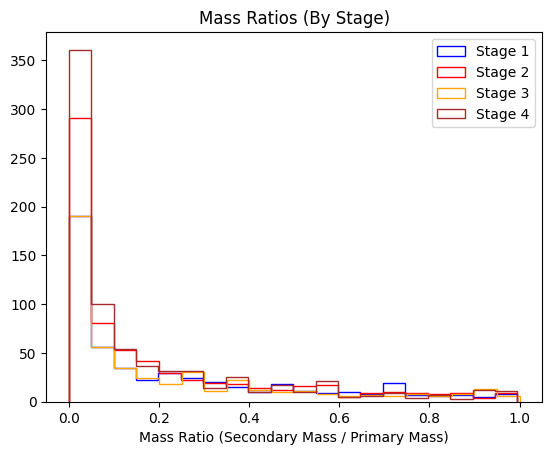

In [26]:
fig, ax1 = plt.subplots(nrows = 1)
cosmo_ratio_1.hist(
    column = ['mass_ratio'],
    ax = ax1,
    bins = 20,
    figsize = (6,8),
    grid = False,
    color = 'blue',
    histtype='step',
    label = ['Stage 1'],
    sharex = True,
    sharey = True
)

cosmo_ratio_2.hist(
    column = ['mass_ratio'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'red',
    histtype='step',
    label = ['Stage 2'],
    sharex = True,
    sharey = True
)

cosmo_ratio_3.hist(
    column = ['mass_ratio'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'orange',
    histtype='step',
    label = ['Stage 3'],
    sharex = True,
    sharey = True
)

cosmo_ratio_4.hist(
    column = ['mass_ratio'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'brown',
    histtype='step',
    label = ['Stage 4'],
    sharex = True,
    sharey = True
)

ax1.set_title('Mass Ratios (By Stage)')
ax1.set_xlabel('Mass Ratio (Secondary Mass / Primary Mass)')
plt.legend()
plt.show()

### Linking Star Formation and Stage

In [27]:
cosmo_ratio.columns

Index(['SourceID', 'redshift_sub', 'ra_1', 'dec_1', 'clon_1', 'clat_1', 'id_1',
       'x_image_1', 'y_image_1', 'errx2_image_1',
       ...
       'ssfr_med_min68_2', 'ssfr_med_max68_2', 'ssfr_best_2', 'l_nu_2',
       'l_r_2', 'l_k_2', 'dist_2', 'angle_2', 'category', 'mass_ratio'],
      dtype='object', length=1084)

In [28]:
cosmo_ratio.sfr_best_2.max()

2.475

In [29]:
def categ_merger(ratio):
    if ratio > 1:
        test = 1/ratio
    if ratio > 0.10:
        return 'major'
    elif ratio <= 0.10 and ratio > 0.001:
        return 'minor'
    else:
        return 'micro'

In [30]:
cosmo_clsf = (
    cosmo_ratio
    .assign(merger_type = cosmo_ratio.mass_ratio.apply(lambda x: categ_merger(x)))
)

In [31]:
cosmo_clsf_1 = cosmo_clsf.query('category == "stage1"')
cosmo_clsf_2 = cosmo_clsf.query('category == "stage2"')
cosmo_clsf_3 = cosmo_clsf.query('category == "stage3"')
cosmo_clsf_4 = cosmo_clsf.query('category == "stage4"')

In [32]:
cosmo_clsf

,SourceID,redshift_sub,ra_1,dec_1,clon_1,clat_1,id_1,x_image_1,y_image_1,errx2_image_1,...,ssfr_med_max68_2,ssfr_best_2,l_nu_2,l_r_2,l_k_2,dist_2,angle_2,category,mass_ratio,merger_type
0,4000705532455,0.170,150.679866,2.196563,10h02m43.17s,02d11m47.63s,590539,9199.92676,21737.71094,0.00013,...,-8.435,-8.666,27.074,27.260,27.124,9.361438,123.114321,NaN,0.018030,minor
1,4000705533312,-0.026,150.668120,2.242867,10h02m40.35s,02d14m34.32s,621053,9482.06250,22848.95508,0.00002,...,-10.231,-10.258,28.661,29.620,29.874,2.627196,14.847254,stage3,0.274157,major
2,4000705533383,-0.135,150.645145,2.237538,10h02m34.83s,02d14m15.14s,617834,10033.03906,22720.83008,0.00011,...,-8.334,-8.448,29.135,29.232,29.068,2.241379,287.399545,stage1,0.797995,major
3,4000705539529,-0.136,149.686238,2.637428,09h58m44.70s,02d38m14.74s,882817,33027.07031,32317.89648,0.00007,...,-8.724,-8.830,28.323,28.572,28.466,3.301196,89.699137,stage1,0.082985,minor
4,4000705539941,-0.135,149.702477,2.654904,09h58m48.59s,02d39m17.66s,893328,32637.59570,32737.23633,0.00012,...,-8.054,-8.240,27.618,27.623,27.561,5.171943,338.551088,stage2,0.130617,major
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,6000536184828,0.043,150.481102,2.605657,10h01m55.46s,02d36m20.37s,862874,13969.48438,31554.84180,0.00001,...,-8.196,-8.543,27.540,27.664,27.613,7.638679,9.844286,stage4,0.001799,minor
2459,6000536185304,0.058,150.471787,2.648527,10h01m53.23s,02d38m54.70s,887383,14193.07617,32583.72852,0.00001,...,-8.424,-8.746,28.699,28.908,28.796,9.098925,95.953708,stage4,0.024322,minor
2460,6000536185496,-0.124,150.501189,2.663116,10h02m00.29s,02d39m47.22s,898134,13488.22363,32934.10156,0.00020,...,-8.062,-8.550,27.942,28.083,27.930,9.743745,314.274351,stage1,0.028445,minor
2461,6000536185585,0.057,150.487626,2.671314,10h01m57.03s,02d40m16.73s,904074,13813.45605,33130.78125,0.00004,...,-8.099,-8.272,27.326,27.343,27.281,2.636796,240.396443,stage3,0.004436,minor


In [33]:
cosmo_clsf.merger_type.value_counts()

minor    1291
major    1126
micro      46
Name: merger_type, dtype: int64

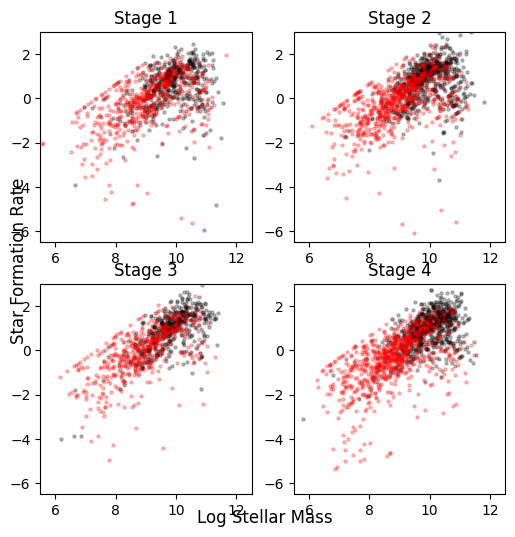

In [34]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (6,6))
axs[0,0].scatter(list(cosmo_clsf_1.mass_best_1), list(cosmo_clsf_1.sfr_best_1), s = 5, color='black', marker = 'o', alpha = 0.25)
axs[0,0].scatter(list(cosmo_clsf_1.mass_best_2), list(cosmo_clsf_1.sfr_best_2), s = 5, color='red', marker = 'o', alpha = 0.25)
axs[0,0].set_xlim([5.5, 12.5])
axs[0,0].set_ylim([-6.5, 3])
axs[0,0].set_title('Stage 1')

axs[0,1].scatter(list(cosmo_clsf_2.mass_best_1), list(cosmo_clsf_2.sfr_best_1), s = 5, color='black', marker = 'o', alpha = 0.25)
axs[0,1].scatter(list(cosmo_clsf_2.mass_best_2), list(cosmo_clsf_2.sfr_best_2), s = 5, color='red', marker = 'o', alpha = 0.25)
axs[0,1].set_xlim([5.5, 12.5])
axs[0,1].set_ylim([-6.5, 3])
axs[0,1].set_title('Stage 2')

axs[1,0].scatter(list(cosmo_clsf_3.mass_best_1), list(cosmo_clsf_3.sfr_best_1), s = 5, color='black', marker = 'o', alpha = 0.25)
axs[1,0].scatter(list(cosmo_clsf_3.mass_best_2), list(cosmo_clsf_3.sfr_best_2), s = 5, color='red', marker = 'o', alpha = 0.25)
axs[1,0].set_xlim([5.5, 12.5])
axs[1,0].set_ylim([-6.5, 3])
axs[1,0].set_title('Stage 3')

axs[1,1].scatter(list(cosmo_clsf_4.mass_best_1), list(cosmo_clsf_4.sfr_best_1), s = 5, color='black', marker = 'o', alpha = 0.25)
axs[1,1].scatter(list(cosmo_clsf_4.mass_best_2), list(cosmo_clsf_4.sfr_best_2), s = 5, color='red', marker = 'o', alpha = 0.25)
axs[1,1].set_xlim([5.5, 12.5])
axs[1,1].set_ylim([-6.5, 3])
axs[1,1].set_title('Stage 4')

fig.text(0.5, 0.07, 'Log Stellar Mass', ha='center', va='center', fontsize = 12)
fig.text(0.09, 0.5, 'Star Formation Rate', ha='center', va='center', rotation='vertical', fontsize = 12)
plt.show()

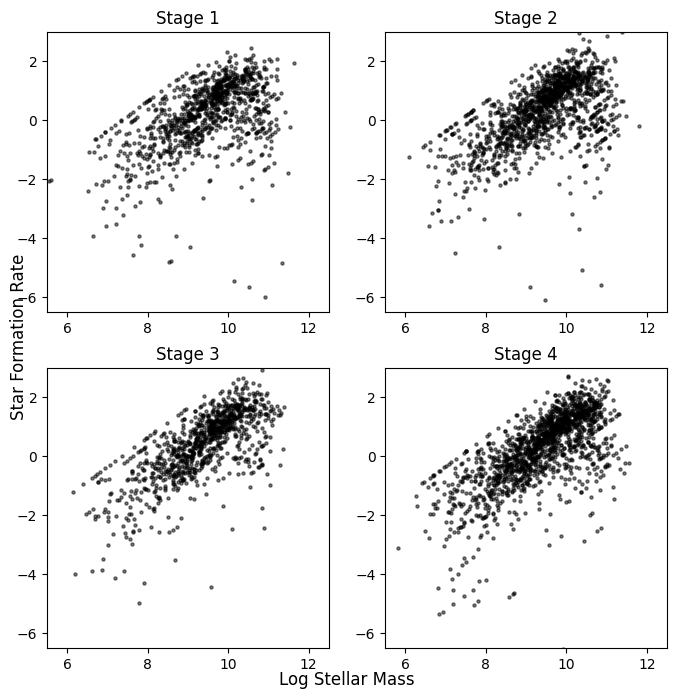

In [35]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
axs[0,0].scatter(list(cosmo_clsf_1.mass_best_1), list(cosmo_clsf_1.sfr_best_1), s = 5, color='black', marker = 'o', alpha = 0.5)
axs[0,0].scatter(list(cosmo_clsf_1.mass_best_2), list(cosmo_clsf_1.sfr_best_2), s = 5, color='black', marker = 'o', alpha = 0.5)
axs[0,0].set_xlim([5.5, 12.5])
axs[0,0].set_ylim([-6.5, 3])
axs[0,0].set_title('Stage 1')

axs[0,1].scatter(list(cosmo_clsf_2.mass_best_1), list(cosmo_clsf_2.sfr_best_1), s = 5, color='black', marker = 'o', alpha = 0.5)
axs[0,1].scatter(list(cosmo_clsf_2.mass_best_2), list(cosmo_clsf_2.sfr_best_2), s = 5, color='black', marker = 'o', alpha = 0.5)
axs[0,1].set_xlim([5.5, 12.5])
axs[0,1].set_ylim([-6.5, 3])
axs[0,1].set_title('Stage 2')

axs[1,0].scatter(list(cosmo_clsf_3.mass_best_1), list(cosmo_clsf_3.sfr_best_1), s = 5, color='black', marker = 'o', alpha = 0.5)
axs[1,0].scatter(list(cosmo_clsf_3.mass_best_2), list(cosmo_clsf_3.sfr_best_2), s = 5, color='black', marker = 'o', alpha = 0.5)
axs[1,0].set_xlim([5.5, 12.5])
axs[1,0].set_ylim([-6.5, 3])
axs[1,0].set_title('Stage 3')

axs[1,1].scatter(list(cosmo_clsf_4.mass_best_1), list(cosmo_clsf_4.sfr_best_1), s = 5, color='black', marker = 'o', alpha = 0.5)
axs[1,1].scatter(list(cosmo_clsf_4.mass_best_2), list(cosmo_clsf_4.sfr_best_2), s = 5, color='black', marker = 'o', alpha = 0.5)
axs[1,1].set_xlim([5.5, 12.5])
axs[1,1].set_ylim([-6.5, 3])
axs[1,1].set_title('Stage 4')

fig.text(0.5, 0.07, 'Log Stellar Mass', ha='center', va='center', fontsize = 12)
fig.text(0.09, 0.5, 'Star Formation Rate', ha='center', va='center', rotation='vertical', fontsize = 12)
plt.show()

### Binning by Redshift

In [36]:
cosmo_clsf.head()

,SourceID,redshift_sub,ra_1,dec_1,clon_1,clat_1,id_1,x_image_1,y_image_1,errx2_image_1,...,ssfr_med_max68_2,ssfr_best_2,l_nu_2,l_r_2,l_k_2,dist_2,angle_2,category,mass_ratio,merger_type
0,4000705532455,0.170,150.679866,2.196563,10h02m43.17s,02d11m47.63s,590539,9199.92676,21737.71094,0.00013,...,-8.435,-8.666,27.074,27.260,27.124,9.361438,123.114321,NaN,0.018030,minor
1,4000705533312,-0.026,150.668120,2.242867,10h02m40.35s,02d14m34.32s,621053,9482.06250,22848.95508,0.00002,...,-10.231,-10.258,28.661,29.620,29.874,2.627196,14.847254,stage3,0.274157,major
2,4000705533383,-0.135,150.645145,2.237538,10h02m34.83s,02d14m15.14s,617834,10033.03906,22720.83008,0.00011,...,-8.334,-8.448,29.135,29.232,29.068,2.241379,287.399545,stage1,0.797995,major
3,4000705539529,-0.136,149.686238,2.637428,09h58m44.70s,02d38m14.74s,882817,33027.07031,32317.89648,0.00007,...,-8.724,-8.830,28.323,28.572,28.466,3.301196,89.699137,stage1,0.082985,minor
4,4000705539941,-0.135,149.702477,2.654904,09h58m48.59s,02d39m17.66s,893328,32637.59570,32737.23633,0.00012,...,-8.054,-8.240,27.618,27.623,27.561,5.171943,338.551088,stage2,0.130617,major


In [37]:
redshift_bins = [0,0.25,0.5, 0.75, 1]

In [38]:
def assign_bin(z, redshift_bins):
    # z < 0.25
    if z <= redshift_bins[1]:
        return 0
    # 0.25 < z < 0.5
    elif z > redshift_bins[1] and z <= redshift_bins[2]:
        return 1
    # 0.5 < z < 0.75
    elif z > redshift_bins[2] and z <= redshift_bins[3]:
        return 2
    # 0.75 z < 1
    elif z > redshift_bins[3] and z <= redshift_bins[4]:
        return 3
    else:
        return None

In [39]:
cosmo_redshift = (
    cosmo_clsf
    .assign(z_bin = cosmo_clsf.photoz_1.apply(lambda x: assign_bin(x, redshift_bins)))
)

### Summing Masses and Star Formation Rates

In [49]:
df_prep = cosmo_redshift[['SourceID', 'mass_best_1', 'mass_best_2', 'sfr_best_1', 'sfr_best_2', 'photoz_1', 'photoz_2', 'z_bin', 'category', 'merger_type']]

In [50]:
def adding_log(logx1, logx2):
    x1 = 10**(logx1)
    x2 = 10**(logx2)
    x = x1 + x2
    logx = np.log10(x)
    return logx

In [51]:
df_sum = (
    df_prep
    .assign(mass_sum = df_prep.apply(lambda row: adding_log(row.mass_best_1, row.mass_best_2), axis = 1))
    .assign(sfr_sum = df_prep.apply(lambda row: adding_log(row.sfr_best_1, row.sfr_best_2), axis = 1))
)

<AxesSubplot:xlabel='Log(M1 + M2)', ylabel='Log(SFR1 + SFR2)'>

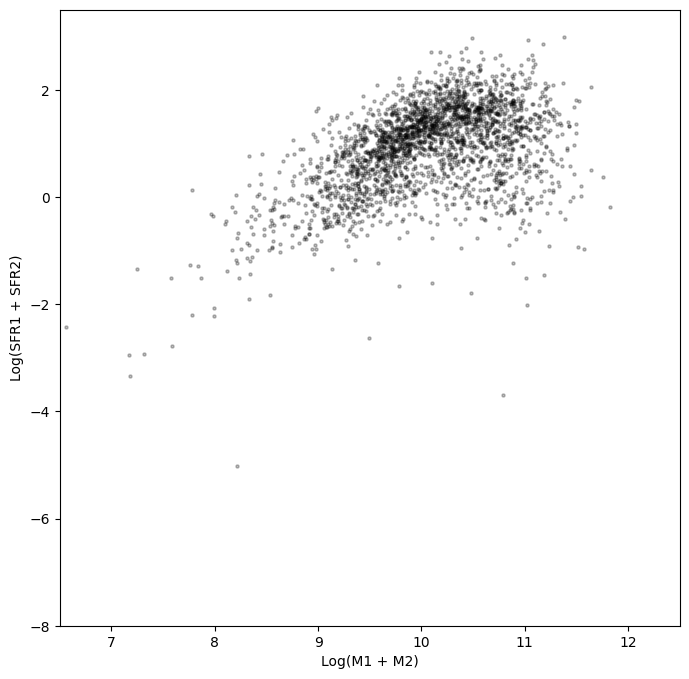

In [54]:
df_sum.plot.scatter(
    x = 'mass_sum',
    y = 'sfr_sum',
    xlabel = 'Log(M1 + M2)',
    ylabel = 'Log(SFR1 + SFR2)',
    figsize = (8,8),
    color = 'black',
    s = 5,
    alpha = 0.25,
    xlim = [6.5, 12.5], 
    ylim = [-8, 3.5]
)

In [62]:
def create_plot(df, ax, stage, control):
    df.plot.scatter(
        x = 'mass_sum',
        y = 'sfr_sum',
        ax = ax,
        xlim = [5,12.5],
        ylim = [-5.5, 4],
        xlabel = '',
        ylabel = '',
        title = f'{control} {stage}',
        color = 'black',
        alpha = 0.25,
        s = 5
    )

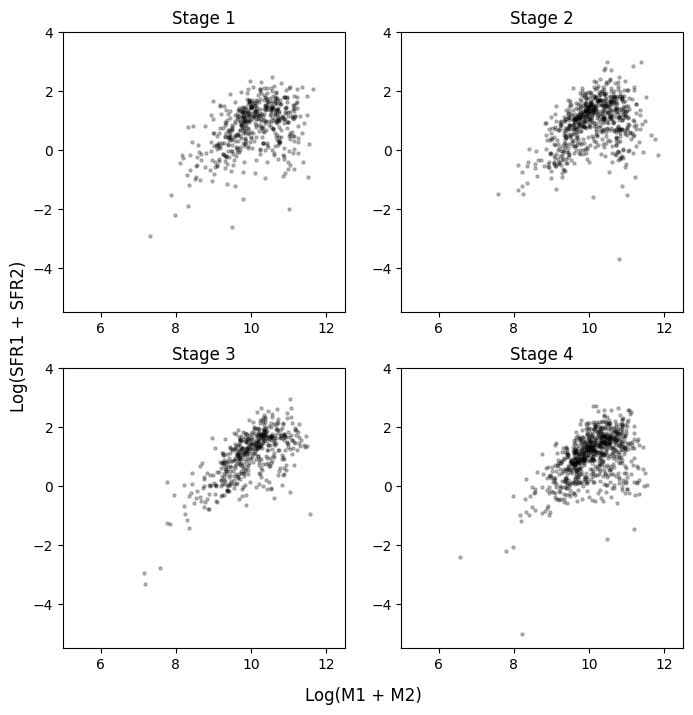

In [63]:
counter = 1
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot(df_sum.query(f'category == "stage{counter}"'), axes[i,j], counter, 'Stage')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M1 + M2)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(SFR1 + SFR2)', ha='center', va='center', rotation='vertical', fontsize = 12)

plt.show()

Below: redshift_bins = [0,0.25,0.5, 0.75, 1]

    Redshift Bin 0 : z < 0.25
    Redshift Bin 1 : 0.25 < z < 0.5
    Redshift Bin 2 : 0.5 < z < 0.75
    Redshift Bin 3 : 0.75 < z < 1

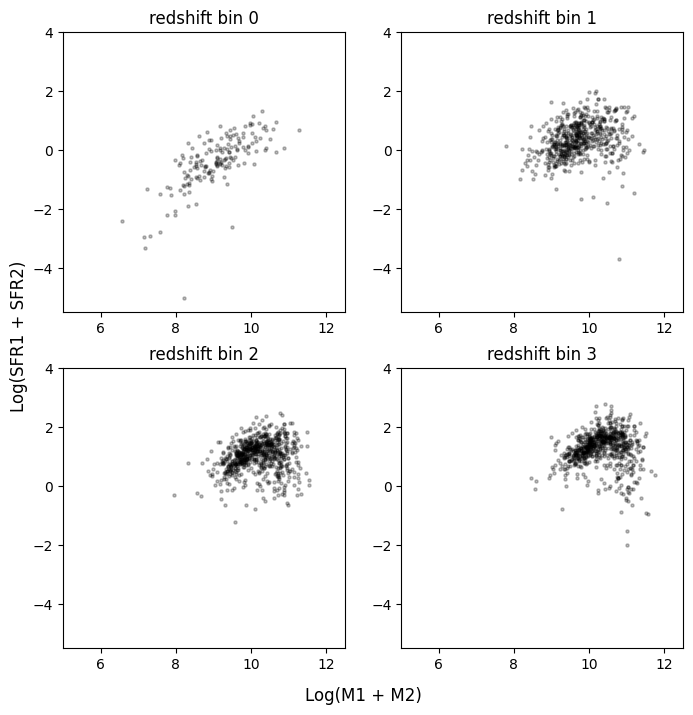

In [64]:
counter = 0
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot(df_sum.query(f'z_bin == @counter'), axes[i,j], counter, 'redshift bin')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M1 + M2)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(SFR1 + SFR2)', ha='center', va='center', rotation='vertical', fontsize = 12)

plt.show()

### Binning by Merger Type

In [65]:
df_micro = df_sum.query('merger_type == "micro"')
df_minor = df_sum.query('merger_type == "minor"')
df_major = df_sum.query('merger_type == "major"')

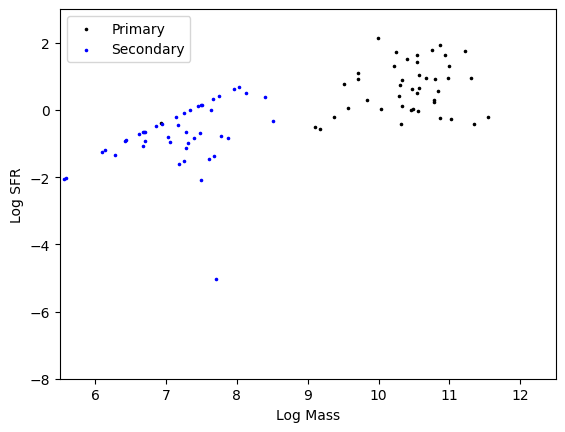

In [66]:
fig, ax = plt.subplots(nrows = 1)
df_micro.plot.scatter(
    x = 'mass_best_1',
    y = 'sfr_best_1',
    ax = ax,
    xlim = [5.5,12.5],
    ylim = [-8, 3],
    xlabel = 'Log Mass',
    ylabel = 'Log SFR',
    label = 'Primary',
    color = 'black',
    s = 2.5
)

df_micro.plot.scatter(
    x = 'mass_best_2',
    y = 'sfr_best_2',
    ax = ax,
    xlim = [5.5,12.5],
    ylim = [-8, 3],
    xlabel = 'Log Mass',
    ylabel = 'Log SFR',
    label = 'Secondary',
    s = 2.5,
    color = 'blue'
)
plt.legend()
plt.show()

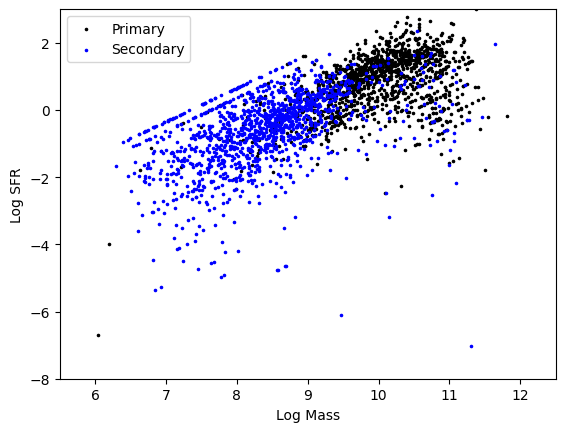

In [67]:
fig, ax = plt.subplots(nrows = 1)
df_minor.plot.scatter(
    x = 'mass_best_1',
    y = 'sfr_best_1',
    ax = ax,
    xlim = [5.5,12.5],
    ylim = [-8, 3],
    xlabel = 'Log Mass',
    ylabel = 'Log SFR',
    label = 'Primary',
    color = 'black',
    s = 2.5
)

df_minor.plot.scatter(
    x = 'mass_best_2',
    y = 'sfr_best_2',
    ax = ax,
    xlim = [5.5,12.5],
    ylim = [-8, 3],
    xlabel = 'Log Mass',
    ylabel = 'Log SFR',
    label = 'Secondary',
    s = 2.5,
    color = 'blue'
)
plt.legend()
plt.show()

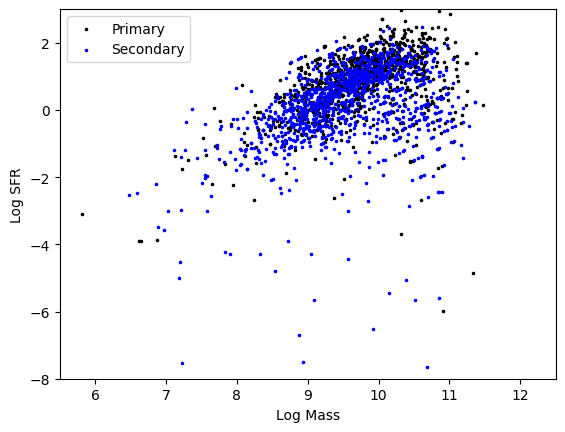

In [68]:
fig, ax = plt.subplots(nrows = 1)
df_major.plot.scatter(
    x = 'mass_best_1',
    y = 'sfr_best_1',
    ax = ax,
    xlim = [5.5,12.5],
    ylim = [-8, 3],
    xlabel = 'Log Mass',
    ylabel = 'Log SFR',
    label = 'Primary',
    color = 'black',
    s = 2.5
)

df_major.plot.scatter(
    x = 'mass_best_2',
    y = 'sfr_best_2',
    ax = ax,
    xlim = [5.5,12.5],
    ylim = [-8, 3],
    xlabel = 'Log Mass',
    ylabel = 'Log SFR',
    label = 'Secondary',
    s = 2.5,
    color = 'blue'
)
plt.legend()
plt.show()

### Binning Strictly on Total Mass

In [70]:
df_prim = (
    cosmo_redshift[['SourceID', 'id_1', 'mass_best_1', 'sfr_best_1', 'photoz_1']]
    .rename(columns = {'id_1': 'c_id', 'mass_best_1':'mass_best','sfr_best_1':'sfr_best','photoz_1':'photoz'})
    .assign(cat = 'primary')
)
df_sec = (
    cosmo_redshift[['SourceID', 'id_2', 'mass_best_2', 'sfr_best_2', 'photoz_2']]
    .rename(columns = {'id_2':'c_id', 'mass_best_2':'mass_best','sfr_best_2':'sfr_best','photoz_2':'photoz'})
    .assign(cat = 'secondary')
)

df_concat = pd.concat([df_prim, df_sec])

In [71]:
df_masses = df_concat.drop_duplicates('c_id', keep = 'first')

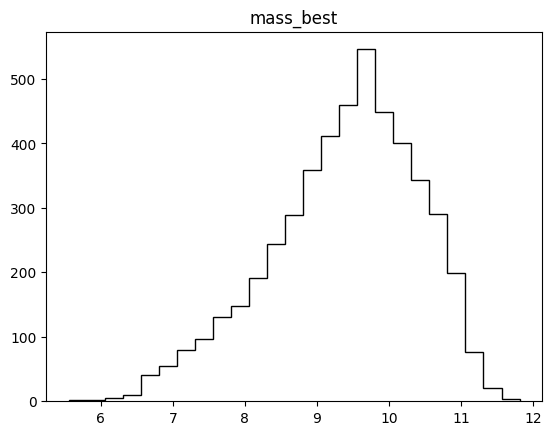

In [74]:
df_masses.hist(
    column = 'mass_best',
    bins = 25,
    grid = False,
    histtype = 'step',
    color='black'
)
plt.show()

In [75]:
mass_bins = [7, 9, 11]

In [76]:
def binning(mass, mass_bins):
    if mass < mass_bins[0]:
        return 0
    elif mass > mass_bins[0] and mass <= mass_bins[1]:
        return 1
    elif mass > mass_bins[1] and mass <= mass_bins[2]:
        return 2
    elif mass > mass_bins[2]:
        return 3
    else:
        return 'Failed'

In [77]:
df_m_bins = (
    df_masses
    .assign(mass_bin = df_masses.mass_best.apply(lambda x: binning(x, mass_bins)))
)

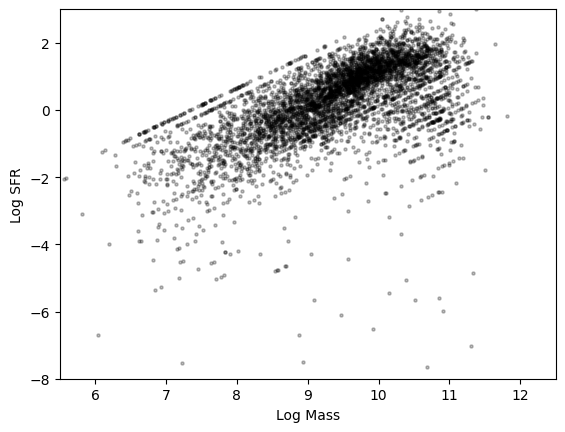

In [78]:
df_m_bins.plot.scatter(
    x = 'mass_best',
    y = 'sfr_best',
    s = 5,
    color = 'black',
    alpha = 0.25,
    xlim = [5.5, 12.5],
    ylim = [-8, 3],
    xlabel = 'Log Mass',
    ylabel = 'Log SFR'
)
plt.show()

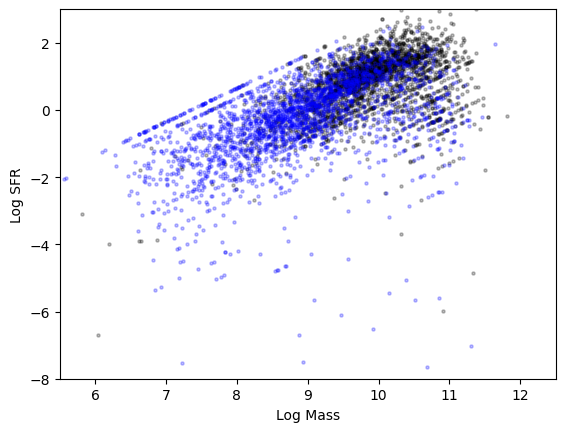

In [79]:
fig, ax = plt.subplots(nrows = 1)
df_m_bins.query('cat == "primary"').plot.scatter(
    x = 'mass_best',
    y = 'sfr_best',
    s = 5,
    color = 'black',
    alpha = 0.25,
    xlim = [5.5, 12.5],
    ylim = [-8, 3],
    xlabel = 'Log Mass',
    ylabel = 'Log SFR',
    ax = ax
)

df_m_bins.query('cat == "secondary"').plot.scatter(
    x = 'mass_best',
    y = 'sfr_best',
    s = 5,
    color = 'blue',
    alpha = 0.25,
    xlim = [5.5, 12.5],
    ylim = [-8, 3],
    xlabel = 'Log Mass',
    ylabel = 'Log SFR',
    ax = ax
)
plt.show()

plt.show()

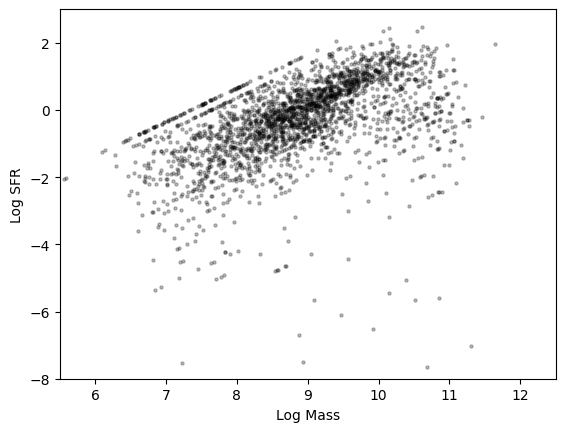

In [80]:
df_m_bins.query('cat == "secondary"').plot.scatter(
    x = 'mass_best',
    y = 'sfr_best',
    s = 5,
    color = 'black',
    alpha = 0.25,
    xlim = [5.5, 12.5],
    ylim = [-8, 3],
    xlabel = 'Log Mass',
    ylabel = 'Log SFR'
)
plt.show()

### Binning by Mass Ratio

In [86]:
df_sum.columns

Index(['SourceID', 'mass_best_1', 'mass_best_2', 'sfr_best_1', 'sfr_best_2',
       'photoz_1', 'photoz_2', 'z_bin', 'category', 'merger_type', 'mass_sum',
       'sfr_sum'],
      dtype='object')

In [99]:
def finding_m_ratio(logm1, logm2):
    m1 = 10 ** logm1
    m2 = 10 ** logm2
    
    if m1 / m2 < 1:
        return m1 / m2
    else:
        return m2 / m1

In [100]:
df_rat = (
    df_sum
    .assign(mass_ratio = df_sum.apply(lambda row: finding_m_ratio(row.mass_best_1, row.mass_best_2), axis = 1))
)

<AxesSubplot:xlabel='Mass Ratio', ylabel='Log Sum SFR'>

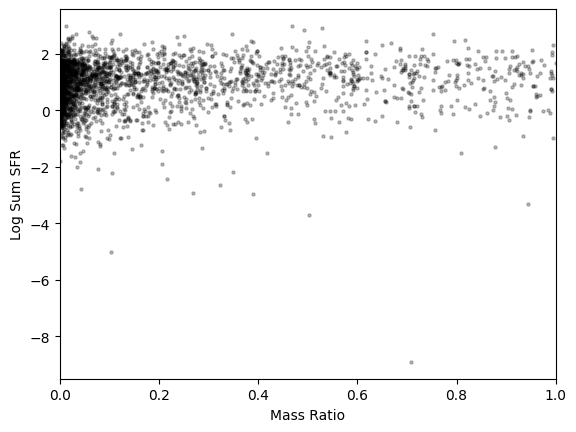

In [102]:
df_rat.plot.scatter(
    x = 'mass_ratio',
    y = 'sfr_sum',
    s = 5,
    color = 'black',
    alpha = 0.25,
    xlabel = 'Mass Ratio',
    ylabel = 'Log Sum SFR',
    xlim = [0,1]
)

In [103]:
def create_plot(df, ax, stage):
    df.plot.scatter(
        x = 'mass_ratio',
        y = 'sfr_sum',
        ax = ax,
        ylim = [-5.5, 3.5],
        xlabel = '',
        ylabel = '',
        color = 'black',
        alpha = 0.25,
        s = 5,
        title = stage
    )

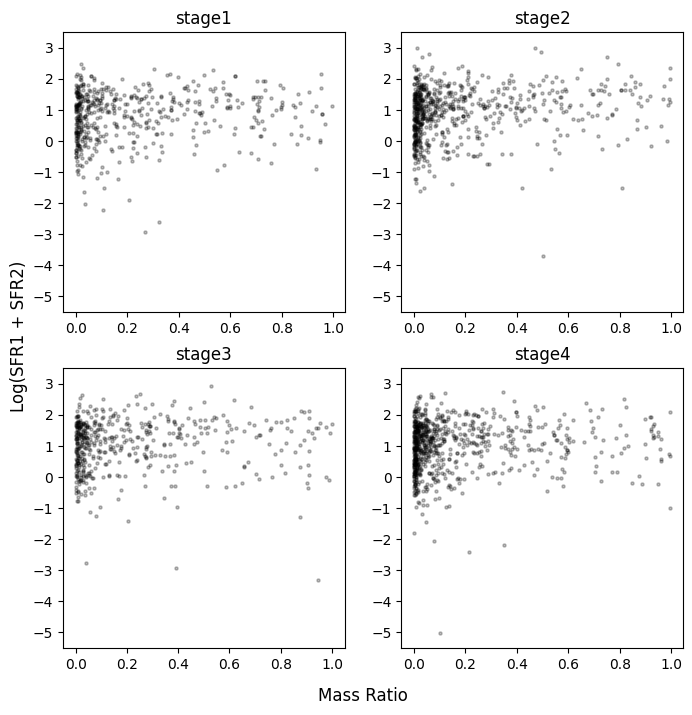

In [104]:
counter = 0
category = ['stage1', 'stage2', 'stage3', 'stage4']
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot(df_rat.query(f'category == "{category[counter]}"'), axes[i,j], category[counter])
        counter += 1
        
fig.text(0.5, 0.05, 'Mass Ratio', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(SFR1 + SFR2)', ha='center', va='center', rotation='vertical', fontsize = 12)

plt.show()

### Selection Effects of Sample

In [105]:
masses = []
for i in list(cosmo_clsf.mass_best_1):
    masses.append(i)
for i in list(cosmo_clsf.mass_best_2):
    masses.append(i)
    
zs = []
for i in list(cosmo_clsf.photoz_1):
    zs.append(i)
for i in list(cosmo_clsf.photoz_2):
    zs.append(i)

In [106]:
m_z_arr = np.asarray(list(zip(masses,zs)))

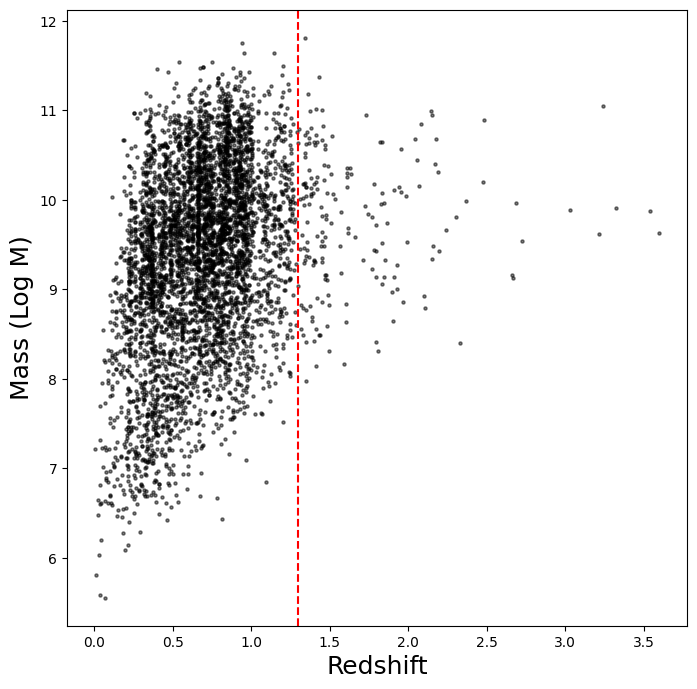

In [107]:
plt.figure(figsize = (8, 8))
plt.scatter(m_z_arr[:,1], m_z_arr[:,0], s=5, alpha = 0.5, color = 'black')
plt.axvline(1.3, color='red',linestyle='--')
plt.xlabel('Redshift', fontsize = 18)
plt.ylabel('Mass (Log M)', fontsize = 18)
plt.show()